In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
# Increasing default figure size of the notebook
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 16

In [3]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings(action='once')

In [4]:
from nltk.tokenize import word_tokenize, sent_tokenize

C:\Users\ca20593\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ca20593\AppData\Local\Continuum\anaconda3\lib\site-packages\nltk\decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
C:\Users\ca20593\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ca20593\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C

In [5]:
survey_data = pd.read_stata('N:\\Research and Policy\\ORP_Data\\Surveys\\TES\\Raw_Files\\2019\\2019TNEdSurveyResultsFile_4.26.19_TDOE.dta')


FileNotFoundError: [Errno 2] No such file or directory: 'N:\\Research and Policy\\ORP_Data\\Surveys\\TES\\Raw_Files\\2019\\2019TNEdSurveyResultsFile_4.26.19_TDOE.dta'

Q12 or Q10?

In [5]:
list(survey_data.columns)[:30]

['tchlic',
 'Email',
 'sch_id',
 'district_no',
 'school_no',
 'district_name',
 'school_name',
 'Fname',
 'Lname',
 'Gender',
 'EthnicOrigin19',
 'YrsExpr19',
 'E_YrsExpCat19',
 'EdLevel19',
 'In_EIS',
 'In_Compass',
 'Role_Compass',
 'Actual_Tch',
 'Actual_Admin',
 'bestguess_tch',
 'bestguess_admin',
 'tch_in_Compass',
 'princ_in_Compass',
 'ap_in_Compass',
 'Flag_ManualAdd',
 'Flag_R2BRCoach',
 'Flag_MNPS_Extra_FromCompass',
 'Tier_Sch',
 'FARM_Quart19',
 'Region']

In [6]:
cols_to_keep = ['tchlic', 'district_no', 'district_name', 'school_no', 'school_name','Gender', 'YrsExpr19', 'EdLevel19', 
                'Role_Compass', 'bestguess_tch', 'bestguess_admin', 'Tier_Sch', 'StartTime', 'Region',
                'EndTime', 'Responded', 'Q10']

In [7]:
df_selected_columns = survey_data.loc[:,cols_to_keep]

In [1]:
# df_selected_columns.head(10)

In [9]:
df_selected_columns.shape

(75593, 17)

In [10]:
# Many ways in which people say no
df_selected_columns.Q10.value_counts().head(15)

                49563
N/A               120
n/a                96
.                  61
NA                 61
na                 40
None               17
none               16
Less testing       13
No comment         11
N/a                11
...                 9
Testing             8
Teacher pay         8
Salary              8
Name: Q10, dtype: int64

In [11]:
# Remove blank or answers which signify no answer
def label_q10 (row):
    ans_str = row['Q10']
#     if 'at this time' in ans_str:
#         print(ans_str)
#         return 0
    if len(row['Q10']) > 23 : # Only keep over 23 characters
          return 1
    return 0

def label_q10_20_words (row):
    ans_str = row['Q10']
    words_list = [comment for comment in word_tokenize(ans_str) if comment.isalpha()]
#     if 'at this time' in ans_str:
#         print(ans_str)
#         return 0
    if len(words_list) > 20 : # Only keep over 20 words
          return 1
    return 0

def length_response (row):
    return len(row['Q10'])

df_selected_columns['answered_q10'] = df_selected_columns.apply(label_q10, axis=1)
df_selected_columns['answered_q10_over_20_words'] = df_selected_columns.apply(label_q10_20_words, axis=1)
df_selected_columns['total_surveys_sent'] = df_selected_columns.shape[0]
df_selected_columns['total_number_responses'] = df_selected_columns.Responded.sum()
df_selected_columns['total_answered_q10'] = df_selected_columns.answered_q10.sum()
df_selected_columns['total_answered_q10_20_words'] = df_selected_columns.answered_q10_over_20_words.sum()
df_selected_columns['response_character_length'] = df_selected_columns.apply(length_response, axis = 1)

In [2]:
# df_selected_columns.head()

In [13]:
print('Number of teachers surveyed: ' + str(sum(df_selected_columns['bestguess_tch'])))
print('Number of teachers responded: ' + str(sum(df_selected_columns.loc[(df_selected_columns.loc[:,'Responded'] == 1) & (df_selected_columns.loc[:,'bestguess_tch'] == 1), 'Responded'])))
print('Number of teachers answered Question 10: ' + str(sum(df_selected_columns.loc[(df_selected_columns.loc[:,'answered_q10'] == 1) & (df_selected_columns.loc[:,'bestguess_tch'] == 1), 'answered_q10'])))


Number of teachers surveyed: 68620
Number of teachers responded: 42558
Number of teachers answered Question 10: 23294


In [14]:
print('Number of admins surveyed: ' + str(sum(df_selected_columns['bestguess_admin'])))
print('Number of admins responded: ' + str(sum(df_selected_columns.loc[(df_selected_columns.loc[:,'Responded'] == 1) & (df_selected_columns.loc[:,'bestguess_admin'] == 1), 'Responded'])))
print('Number of admins answered Question 10: ' + str(sum(df_selected_columns.loc[(df_selected_columns.loc[:,'answered_q10'] == 1) & (df_selected_columns.loc[:,'bestguess_admin'] == 1), 'answered_q10'])))


Number of admins surveyed: 3573
Number of admins responded: 2063
Number of admins answered Question 10: 1159


In [15]:
df_selected_columns.loc[df_selected_columns['answered_q10'] == 1,:].Q10.value_counts().head(20)

Teacher pay and benefits                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             3
Less standardized testing                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [16]:
# Converting the column of the DF with answers into a list of answers
open_ended_answers = df_selected_columns.loc[df_selected_columns['answered_q10'] == 1,:].Q10.tolist()

In [17]:
open_ended_answers[:5]

['Reduce time testing and improve efficiency of  testing.',
 'Developmentally appropriate standards that have rigor. Help with students that have ACES (Adverse Childhood Experiences)situations so they can be ready to learn. These students cannot concentrate on school.',
 '"Eliminate the TN Ready exam and replace it with something else that is more statistically reliable and fair to everyone.  The current testing only requires that a select number of teachers are evaluated based on the TN Ready exam.  This in itself is unfair because the teachers in the tested subjects are under a lot more stress than those who do not test.  Likewise, it seems unfair for the teachers who do not test to receive a score based upon the scores of those who do test.  At our school, some tested subjects have the entire year for instruction while others must complete the course in one semester.  In Algebra 2 (a full year course), teachers are allowed to drop the failing students at the half-way point.  Consequ

In [18]:
# Selecting columns from the base DF where the open ended question was answered
df_open_answered = df_selected_columns.loc[df_selected_columns.loc[:,'answered_q10'] == 1, :]

In [19]:
# df_open_answered.to_csv('answered_q10_2019.csv', index = False)

In [20]:
print('The number of people who left a comment is: ' + str(len(open_ended_answers)))

The number of people who left a comment is: 24761


In [ ]:
df_selected_columns.loc[(df_selected_columns['answered_q10'] == 1) & (df_selected_columns['Q10'].str.contains("Focus less on graduation rates, more on practical planning for after school.") ),:]

In [ ]:
df_selected_columns.loc[(df_selected_columns['answered_q10'] == 1) & (df_selected_columns['Q10'].str.contains("The continued work in early literacy is extremely important and valuable.") ),:]

In [ ]:
df_selected_columns.loc[(df_selected_columns['answered_q10'] == 1) & (df_selected_columns['Q10'].str.contains("I would like the Commissioner to look at classrooms and the % of students that have learning disabilities") ),:]

In [24]:
len(df_selected_columns.tchlic.unique())

75593

In [25]:
len(df_selected_columns.loc[df_selected_columns.loc[:,'answered_q10'] == 1, 'Q10'].unique())

24732

# No nans in yrs expr

In [26]:
no_null_df = df_selected_columns[pd.notnull(df_selected_columns['YrsExpr19'])]
no_null_df = no_null_df.loc[no_null_df.school_no != 0]

In [27]:
no_null_df.Responded.sum()

44261

# Max years experience

In [28]:
df_selected_columns.YrsExpr19.max()

59.0

# Distribution of words per comment

In [29]:
open_ended_answers_any_length = df_selected_columns.loc[df_selected_columns['response_character_length'] >= 1,:].Q10.tolist()

In [30]:
words_list = [word_tokenize(comment) for comment in open_ended_answers_any_length]

In [31]:
words_list_no_punct = [[token for token in token_list if token.isalpha()] for token_list in words_list]

In [32]:
comment_word_counts = [len(word_list) for word_list in words_list_no_punct]

In [33]:
round(np.mean(comment_word_counts), 0)

53.0

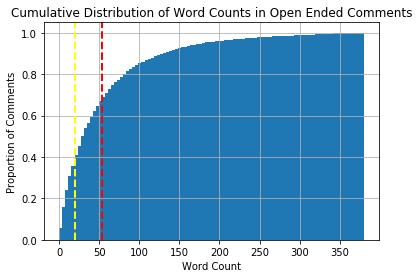

In [34]:
f, ax = plt.subplots()
ax.hist(comment_word_counts, bins = 100, density = True,cumulative=True)
ax.axvline(20, color='yellow', linestyle='dashed', linewidth=2)
ax.axvline(round(np.mean(comment_word_counts), 0), color='red', linestyle='dashed', linewidth=2)
# ax.axhline(0.5, color='red', linestyle='dashed', linewidth=2)
ax.grid()
# plt.xticks([0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,34,360,380])
ax.set_xlabel('Word Count')
ax.set_ylabel('Proportion of Comments')
ax.set_title('Cumulative Distribution of Word Counts in Open Ended Comments');

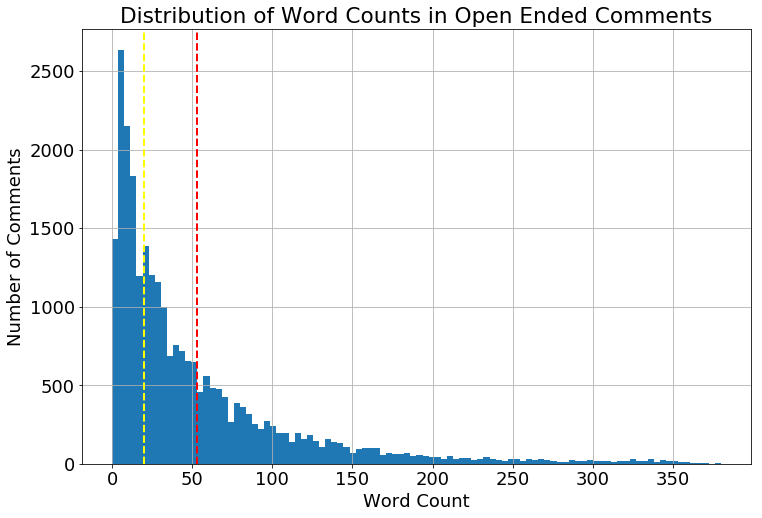

In [44]:
f, ax = plt.subplots()
ax.hist(comment_word_counts, bins = 100)
ax.axvline(20, color='yellow', linestyle='dashed', linewidth=2)
ax.axvline(round(np.mean(comment_word_counts), 0), color='red', linestyle='dashed', linewidth=2)
# ax.axhline(0.5, color='red', linestyle='dashed', linewidth=2)
ax.grid()
# plt.xticks([0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,34,360,380])
ax.set_xlabel('Word Count')
ax.set_ylabel('Number of Comments')
ax.set_title('Distribution of Word Counts in Open Ended Comments');

# Sentences per comment

In [36]:
sent_list = [sent_tokenize(comment) for comment in open_ended_answers_any_length]

In [37]:
sent_list[0]

['Reduce time testing and improve efficiency of  testing.']

In [38]:
comment_sent_counts = [len(sents) for sents in sent_list if len(sents) != 126]

In [39]:
max(comment_sent_counts)

37

In [40]:
[sent for sent in sent_list if len(sent) == 126]

[['>CT.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >CT.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >CT.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >CT.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >CT.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FUNDING >C.T.E.',
  'FU

In [41]:
round(np.mean(comment_sent_counts), 2)

3.67

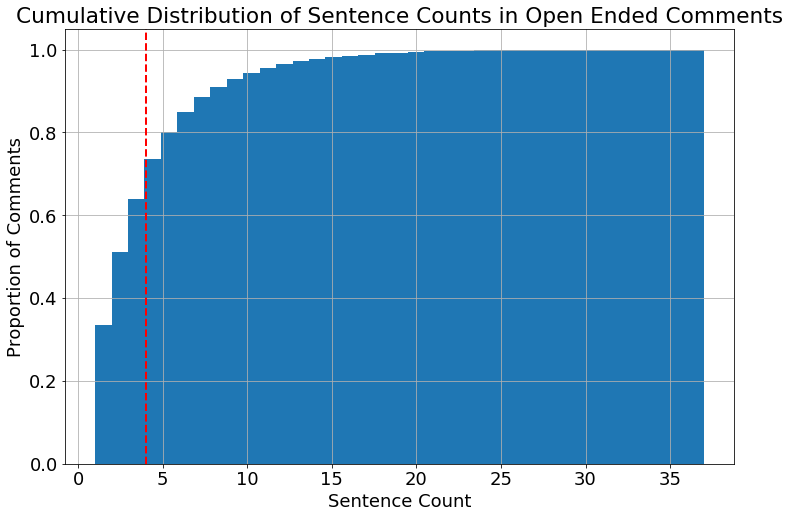

In [45]:
f, ax = plt.subplots()
ax.hist(comment_sent_counts, bins = 37, density = True,cumulative=True)
# ax.axvline(20, color='red', linestyle='dashed', linewidth=2)
ax.axvline(round(np.mean(comment_sent_counts), 0), color='red', linestyle='dashed', linewidth=2)
# ax.axhline(0.5, color='red', linestyle='dashed', linewidth=2)
ax.grid()
# plt.xticks([0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,34,360,380])
ax.set_xlabel('Sentence Count')
ax.set_ylabel('Proportion of Comments')
ax.set_title('Cumulative Distribution of Sentence Counts in Open Ended Comments');